In [33]:
%matplotlib inline
import os
from os import path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import *
from scipy.stats import *
from numpy import *

# The Beta-Binomial Model
Problem: inferring the probability a coin lands on heads, given a series of coin tosses.

$$
\begin{align}
    X_i &\sim Ber(\theta) \\
        &= \theta ^ {N_1} (1 - \theta)^{N_0}
\end{align}
$$

$\theta \in [0,1]$ is the $rate$ parameter, which defines the probability of heads (1).

$N_1 = \sum_{i=1}^N I(x_i = 1)$ is the number of heads observed in the $N$ tosses.

$N_0 = \sum_{i=1}^N I(x_i = 0)$ is the number of tails observed in the $N$ tosses.

$N_1$ and $N_0$ are one set (of several) of sufficient statistics.

### Likelihood
The likelihood is based on the actual data, separate from our (prior) beliefs. This part of the model addresses the coin tosses actually made, the data actually sampled. We note that, through $N$ coin tosses, the likelihood of the coin landing on heads follows a Binomial distribution.

$$
\begin{align}
    N_1 &= Bin(k|N,\theta) \\
        &= Bin(N_1|N,\theta) \\
        &= Bin(N_1|N_1+N_0,\theta) \\
        &= \binom N {N_1} \theta^{N_1} {(1-\theta)}^{1-N_1} \\
        &= \binom N {N_1} \theta^{N_1} {(1-\theta)}^{N_0}
\end{align}
$$

## Prior
For the likelihood $N_1 = Bin(N,\theta)$, the conjugate prior is the Beta distribution:

$$
\begin{align}
    p(\theta) &= Beta(\theta|a,b) \\
              &\propto \theta^{a-1} {(1-\theta)}^{b-1}
\end{align}
$$

what we want | how we encode it

$\mu_\theta = 0.7$, $\sigma_\theta = 0.2$ | a=2.975, b=1.275

assume nothing | a=1, b=1

## Posterior
$$
\begin{align}
    p(\theta|D) &\propto Bin(N_1|N_1+N_0,\theta)Beta(\theta|a,b) \\
                &= \theta^{N_1}{(1-\theta)^{N_0}}\theta^{a-1}{(1-\theta)}^{b-1} \\
                &= \theta^{N_1 + a - 1}{(1-\theta)}^{N_0 + b - 1} \\
                &= Beta(\theta|N_1 + a,N_0 + b)
\end{align}
$$

Comparing the posterior with the prior and the likelihood, the effect of the likelihood on the prior is to add the empirical counts $N_1$ and $N_0$ to the "pseudocounts" $a$ and $b$ of the prior.

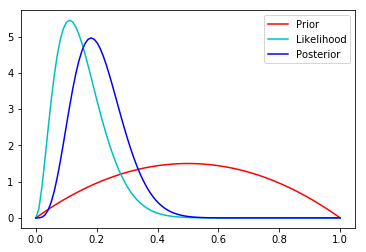

In [32]:
x = linspace(0, 1, 100)
prior = beta(a=2, b=2).pdf(x)
likelihood = beta(a=3, b=17).pdf(x)
posterior = beta(a=5, b=19).pdf(x)

plt.figure()
plt.plot(x, prior, color='r')
plt.plot(x, likelihood, color='c')
plt.plot(x, posterior, color='b')
plt.legend(["Prior", "Likelihood", "Posterior"])

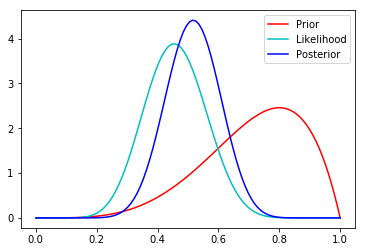

In [31]:
x = linspace(0, 1, 100)
prior = beta(a=5, b=2).pdf(x)
likelihood = beta(a=11, b=13).pdf(x)
posterior = beta(a=16, b=15).pdf(x)

plt.figure()
plt.plot(x, prior, color='r')
plt.plot(x, likelihood, color='c')
plt.plot(x, posterior, color='b')
plt.legend(["Prior", "Likelihood", "Posterior"])

## Posterior Mean and Mode
$$
\begin{align}
    {\hat{\theta}}_{MAP} &= \frac {a+N_1-1} {a+b+N-2} \\
    {\hat{\theta}}_{MLE} &= \frac {N_1} N \\
    \bar{\theta}         &= \frac {a+N_1} {a+b+N} \\
                         &= \lambda m_1 + (1-\lambda) \hat{\theta}_{MLE}
\end{align}
$$

## Posterior Variance
TODO more derivation

For $N \gg a,b$,

$$
\begin{align}
    var[\theta|D] &\approx \frac {N_1 N_0} {N N N} \\
                  &= \sqrt \frac {\hat{\theta}_{MLE} (1 - \hat{\theta}_{MLE})} N
\end{align}
$$

## Posterior Predictive Distribution
While the posterior distribution is the distribution of the parameters as a combination of the prior and likelihood, the posterior predictive distribution is the distribution of predictions on future data when using the posterior parameter distribution.

$$
\begin{align}
    p(\tilde{x}=1|D) &= \int_0^1 p(x=1|\theta)p(\theta|D)d\theta \\
                     &= \int_0^1 \theta\ Beta(\theta|a,b)\ d\theta \\
                     &= E[\theta|D] \\
                     &= \frac a {a+b}
\end{align}
$$

# The Dirichlet-Multinomial Model
The Beta-Binomial approach models binary outcomes; the Dirichlet-Multinomial model generalizes this to events that have more than two (K) potential outcomes.

## Likelihood
Assuming the data is i.i.d,

$$
p(D|\theta) = \prod_{k=1}^K \theta^{N_k} \\
N_k = \sum_{i=1}^N I(x_i=k)
$$

## Prior
Desired criteria:
- support over the probability simplex (the space that the parameter vector spans)
- conjugate to the likelihood

A distribution which satisfies these criteria is the Dirichlet distribution:

$$
Dir(\theta|\alpha) = \frac 1 {B(\alpha)} \prod_{k=1}^K \theta_k^{\alpha_k-1} I(x \in S_K)
$$

## Posterior
$$
\begin{align}
    p(\theta|D) &\propto p(D|\theta)p(\theta) \\
                &\propto \prod_{k=1}^K \theta_k^{N_k} \theta_k^{\alpha_k - 1} \\
                &= \prod_{k=1}^K \theta_k^{N_k+\alpha_k-1} \\
                &= Dir(\theta|\alpha_1+N_1,...,\alpha_k+N_k)
\end{align}
$$

## Posterior Predictive Distribution
$$
\begin{align}
    p(X=j|D) &= \int_0^1 p(X=j|\theta)p(\theta|D)d\theta \\
             &= \int_0^1 \theta_j p(\theta_j|D)d\theta_j \\
             &= E[\theta_j|D] \\
             &= \frac {\alpha_j + N_j} {\sum_{k=1}^K \alpha_k + N_k}
\end{align}
$$